<a href="https://colab.research.google.com/github/ak-ghoul/100DaysOfMLCode/blob/master/Stocks_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import csv
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
date = []
price = []

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving HistoricalQuotes.csv to HistoricalQuotes (2).csv
User uploaded file "HistoricalQuotes.csv" with length 4614 bytes


In [4]:
!ls

'HistoricalQuotes (1).csv'   HistoricalQuotes.csv
'HistoricalQuotes (2).csv'   sample_data


In [5]:
h_r = pd.read_csv('HistoricalQuotes.csv')
h_q = pd.DataFrame(h_r)
h_q.head()

,date,close,volume,open,high,low
0,14:50,180.81,"23,764,843",180.00,182.67,179.37
1,2019/03/11,178.90,31123000.0000,175.49,179.12,175.35
2,2019/03/08,172.91,23985960.0000,170.32,173.07,169.50
3,2019/03/07,172.50,24755470.0000,173.87,174.44,172.02
4,2019/03/06,174.52,20755140.0000,174.67,175.49,173.94


In [0]:
def get_data(filename):
  
  with open(filename, 'r') as csvfile:
    csvReader = csv.reader(csvfile)
    next(csvReader)
    for row in csvReader:
      if row[0] == '14:50':
          continue
      t = row[0].split('/')
      date.append(int(t[0]))
      price.append(float(row[1]))
  return  

In [0]:
def predict_price(date, price, x):
  date = np.reshape(date,(len(date),1))
  
  svr_lin = SVR(kernel = 'linear', C = 1e3)
  svr_poly = SVR(kernel = 'poly', C = 1e3, degree = 2)
  svr_rbf = SVR(kernel = 'rbf', C = 1e3, gamma = 0.1)
  svr_lin.fit(date, price)
  svr_poly.fit(date, price)
  svr_rbf.fit(date, price)
  
  plt.scatter(date, price, color = 'black', label = 'Data')
  plt.plot(date, svr_lin.predict(date), color = 'Red', label = 'Lin Model')
  plt.plot(date, svr_rbf.predict(date), color = 'Green', label = 'Rbf Model')
  plt.plot(date, svr_poly.predict(date), color = 'Blue', label = 'Polynomial Model')
  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.title('Support Vector Regression')
  plt.legend()
  plt.show()
  
  return svr_lin.predict(x)[0], svr_rbf.predict(x)[0], svr_poly.predict(x)[0]

  

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


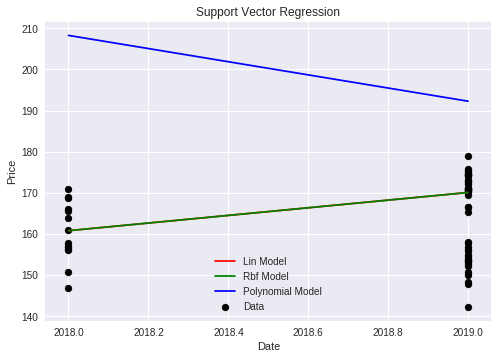

(-18317.020000095068, 165.435, -9165.79165997644)


In [8]:
get_data('HistoricalQuotes.csv')
predicted_price = predict_price(date,price,np.array((29.0)).reshape(-1,1))
print(predicted_price)